In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from head import opentrons, AmplitudePhaseDistance
from scipy.spatial import distance
from scipy.special import rel_entr

import warnings
warnings.filterwarnings('ignore')

In [155]:
!pip install seaborn
import seaborn as sns

In [161]:
class Simulator:
    
    def __init__(self):
        self.domain = np.linspace(-5,5,100)
        
    def generate(self, mu, sig):
        scale = 1/(np.sqrt(2*np.pi)*sig)
        return scale*np.exp(-np.power(self.domain - mu, 2.) / (2 * np.power(sig, 2.)))
    
    def process_batch(self, Cb, fname):
        out = []
        for c in Cb:
            out.append(self.generate(*c))
        out = np.asarray(out)
        df = pd.DataFrame(out.T, index=self.domain)
        df.to_excel(fname, engine='openpyxl')
        
        return 
    
    def make_target(self, ct):
        return self.domain, self.generate(*ct)
    
    
def APdist(f1,f2,xt):
    da, dp = AmplitudePhaseDistance(f1,f2,xt)
    
    return -(da+dp)

def KL(f1, f2):
    return sum(rel_entr(f1, f2))

0.22127174432012897


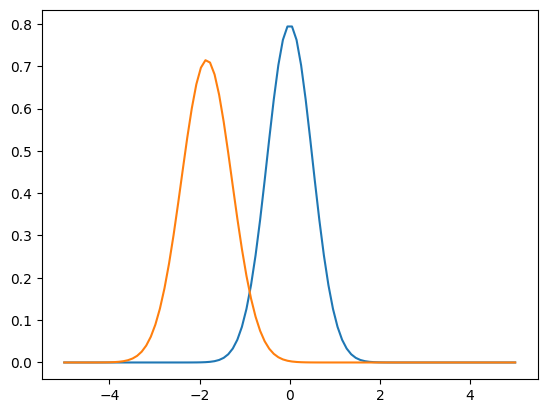

In [170]:
sim = Simulator()
target = np.array([0, 0.5])
query = np.array([-1.842, 0.558])
xt, yt = sim.make_target(target)
xq, yq = sim.make_target(query)

plt.plot(xt, yt)
plt.plot(xq, yq)

dist = -APdist(yt, yq, xt)
print(dist)

In [163]:
sim = Simulator()
target = np.array([0, 0.5])
xt, yt = sim.make_target(target)

range_mu = [-5, 5]
range_sig = [0.1, 3.0]

ls_mu = np.linspace(range_mu[0], range_mu[1], 20)
ls_sig = np.linspace(range_sig[0], range_sig[1],20)

dists = []
for mu_q in ls_mu:
    mu_dists = []
    for sig_q in ls_sig: 
        query = np.array([mu_q, sig_q])
        xq, yq = sim.make_target(query)
        ap_dist = -APdist(yt, yq, xt)
        mu_dists.append(ap_dist)
    dists.append(mu_dists)
    
dists = np.array(dists)


        

Text(145.72222222222223, 0.5, 'mu')

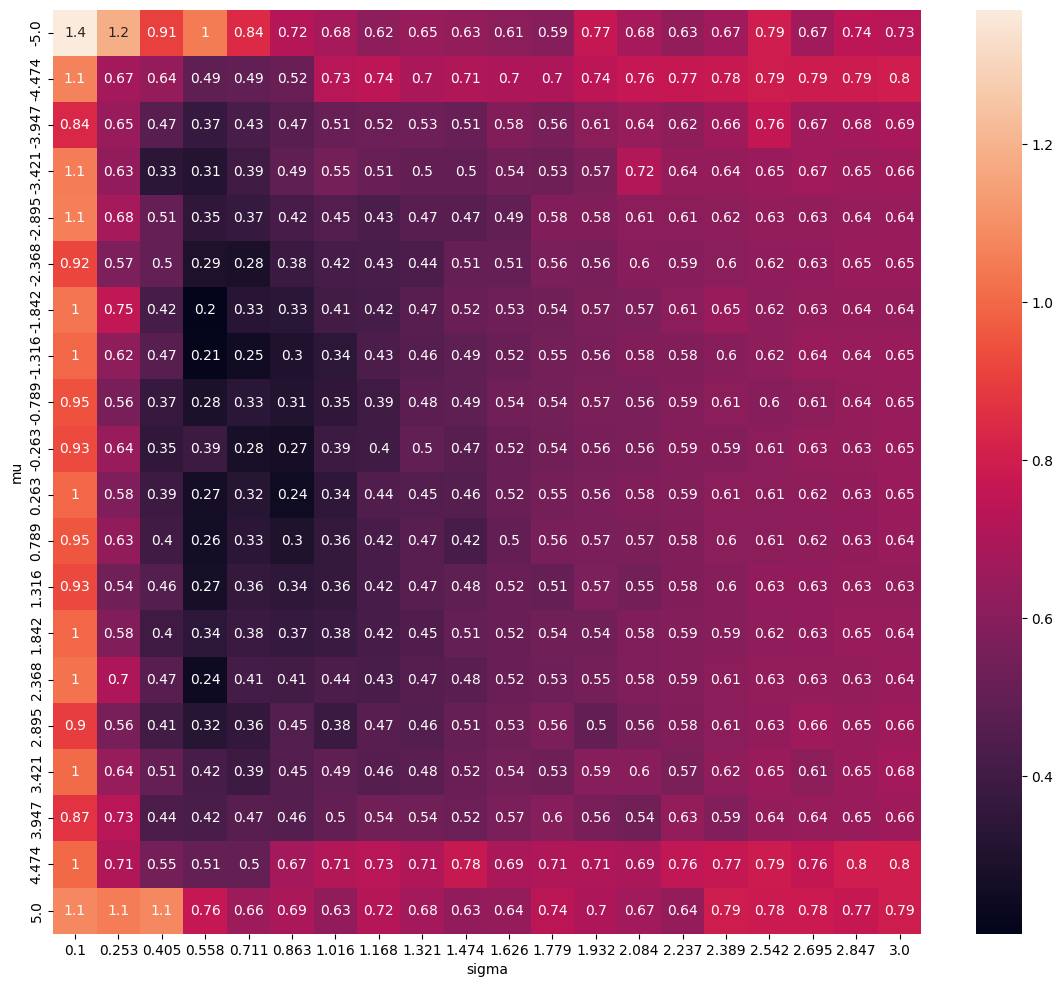

In [167]:
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(dists, ax=ax, xticklabels=np.round_(ls_sig,3), yticklabels=np.round_(ls_mu,3), annot=True)
ax.set_xlabel('sigma')
ax.set_ylabel('mu')

In [168]:
np.amin(dists)

0.20049380346377352

In [146]:
# np.random.seed(100704)
# query = np.array([
#     np.random.uniform(range_mu[0], range_mu[1], size=None,),
#     np.random.uniform(range_sig[0], range_sig[1], size=None,),
# ])
#query = np.array([-0.2868, 0.6793])
#query = np.array([-2.1279, 0.6187])
# query = np.array([-2, 0.53])
query1 = np.array([-2, 0.5])
query2 = np.array([-3, 0.5])
query3 = np.array([-2, 0.8])

In [147]:
xq1, yq1 = sim.make_target(query1)
xq2, yq2 = sim.make_target(query2)
xq3, yq3 = sim.make_target(query3)

In [148]:
#dist = APdist(yq, yt, xt)
ap_dist1 = APdist(yt, yq1, xt)
ap_dist2 = APdist(yt, yq2, xt)
ap_dist3 = APdist(yt, yq3, xt)
kl_dist1 = KL(yt, yq1)
kl_dist2 = KL(yt, yq2)
kl_dist3 = KL(yt, yq3)

Text(0.5, 1.0, 'APdist3 : 0.572 KLdiv2 : 194.9898')

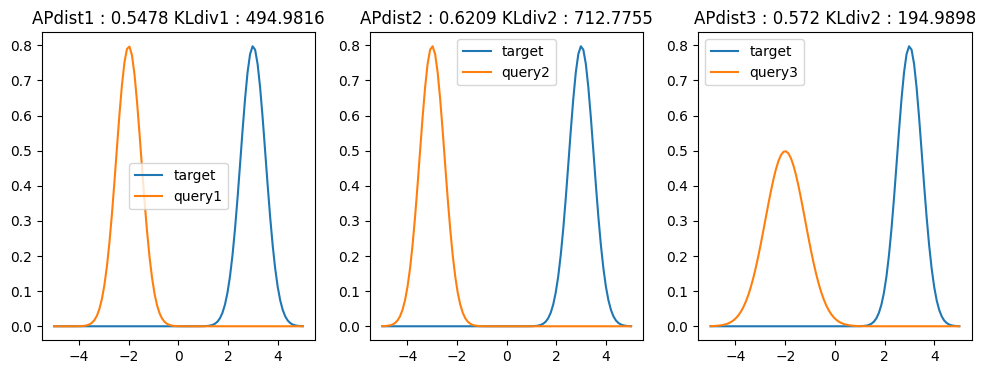

In [150]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
axes[0].plot(xt, yt, label='target')
axes[0].plot(xq1, yq1, label='query1')
axes[0].legend()
axes[0].set_title(f'APdist1 : {round(-ap_dist1,4)} KLdiv1 : {round(kl_dist1,4)}')


axes[1].plot(xt, yt, label='target')
axes[1].plot(xq2, yq2, label='query2')
axes[1].legend()
axes[1].set_title(f'APdist2 : {round(-ap_dist2,4)} KLdiv2 : {round(kl_dist2,4)}')

axes[2].plot(xt, yt, label='target')
axes[2].plot(xq3, yq3, label='query3')
axes[2].legend()
axes[2].set_title(f'APdist3 : {round(-ap_dist3,4)} KLdiv2 : {round(kl_dist3,4)}')